In [30]:
import rasterio

import matplotlib.pyplot as plt 
from matplotlib import colors

In [31]:
RAW_PATH = '/Users/robertodelprete/Desktop/AutoFocusNet/Data/DECODED/s1a-s3-raw-s-hh-20240524t213606-20240524t213631-054018-069139/s1a-s3-raw-s-hh-20240524t213606-20240524t213631-054018-069139.pkl'
SLC_PATH = '/Users/robertodelprete/Desktop/AutoFocusNet/Data/SLC-SRC/S1A_S3_SLC__1SDH_20240524T213606_20240524T213631_054018_069139_A9AD.SAFE/measurement/s1a-s3-slc-hh-20240524t213606-20240524t213631-054018-069139-001.tiff'

In [32]:
with rasterio.open(SLC_PATH) as dataset:
    # Print dataset properties
    print("Dataset properties:")
    print(f"Name: {dataset.name}")
    print(f"Mode: {dataset.mode}")
    print(f"Count: {dataset.count}")
    print(f"Width: {dataset.width}")
    print(f"Height: {dataset.height}")
    print(f"CRS: {dataset.crs}")
    print(f"Transform: {dataset.transform}")

    # Read the first band
    band1 = dataset.read(1)

Dataset properties:
Name: /Users/robertodelprete/Desktop/AutoFocusNet/Data/SLC-SRC/S1A_S3_SLC__1SDH_20240524T213606_20240524T213631_054018_069139_A9AD.SAFE/measurement/s1a-s3-slc-hh-20240524t213606-20240524t213631-054018-069139-001.tiff
Mode: r
Count: 1
Width: 19094
Height: 46824
CRS: None
Transform: | 1.00, 0.00, 0.00|
| 0.00, 1.00, 0.00|
| 0.00, 0.00, 1.00|


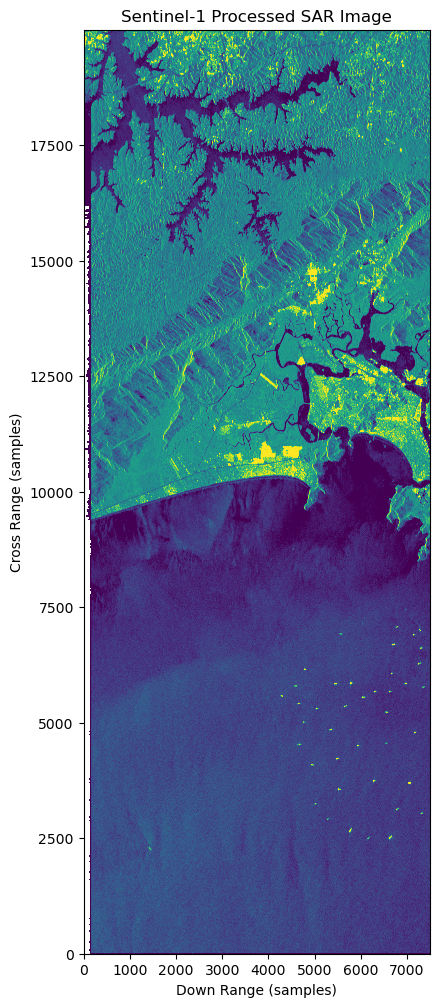

In [43]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

def plotta(img):
    plt.figure(figsize=(12, 12))
    plt.title("Sentinel-1 Processed SAR Image")
    
    img_abs = abs(img)
    vmin, vmax = np.percentile(img_abs, [25, 99])
    
    plt.imshow(img_abs, origin='lower', norm=colors.LogNorm(vmin=vmin, vmax=vmax))
    plt.xlabel("Down Range (samples)")
    plt.ylabel("Cross Range (samples)")
    plt.show()

plotta(band1[:20000,:7500])

In [36]:
import pandas as pd 

raw_f = pd.read_pickle('/Users/robertodelprete/Desktop/AutoFocusNet/Data/DECODED/s1a-s3-raw-s-hh-20240524t213606-20240524t213631-054018-069139/focused-s1a-s3-raw-s-hh-20240524t213606-20240524t213631-054018-069139.pkl')

In [39]:
raw_f.shape

(19250, 21838)

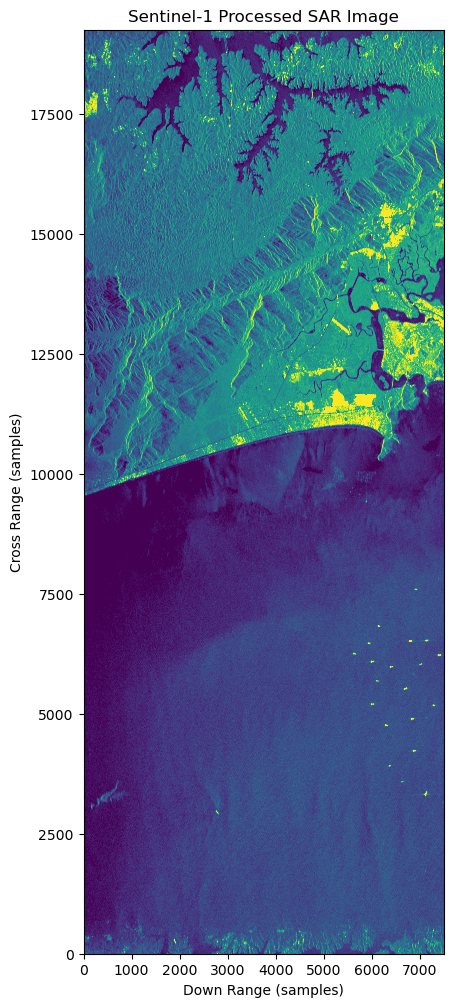

In [41]:
plotta(raw_f[:,:7500])